<a href="https://colab.research.google.com/github/Alexandre77777/computer_math/blob/main/6.%20%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0%20%D1%81%20%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8.%20%D0%9C%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D0%BE%D1%82%D0%BE%D1%87%D0%BD%D0%B0%D1%8F%20%D0%B8%20%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D0%BE%D1%80%D0%BD%D0%B0%D1%8F%20%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.%20%D0%93%D0%B5%D0%BD%D0%B5%D1%80%D0%B0%D1%82%D0%BE%D1%80%D1%8B/%D0%A2%D0%B5%D0%BE%D1%80%D0%B8%D1%8F_%E2%84%966_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%D0%BC%D0%B8_(OpenPyXL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема №6. Работа с Excel-таблицами

## OpenPyXL


**OpenPyXL** — это библиотека на **Python**, предназначенная для чтения и записи файлов формата **Excel 2010** (**xlsx/xlsm/xltx/xltm**). Она была создана из-за отсутствия существующей библиотеки, позволяющей нативно работать с форматом **Office Open XML** в **Python**. Интересно, что **openpyxl** изначально базировалась на **PHPExcel**, за что мы можем выразить благодарность команде **PHPExcel**.

Вот несколько ключевых моментов о **OpenPyXL**:

1. **Чтение и запись Excel-файлов**: **OpenPyXL** позволяет открывать и редактировать файлы **Excel 2010**.
2. **Поддержка разных форматов**: Она работает с **xlsx**, **xlsm**, **xltx** и **xltm** файлами.
3. **Простой синтаксис**: Вы можете легко создавать, изменять и сохранять данные в таблицах Excel.

## Работа с таблицами Excel

### **Материалы взяты из книги** [**Python для Excel**](https://www.chitai-gorod.ru/product/python-dlya-excel-sovremennaya-sreda-dlya-avtomatizacii-i-analiza-dannyh-2994629)

Загрузка исходных данных

In [ ]:
!git clone --recursive https://github.com/tester170/Other.git
!ls Other/

Cloning into 'Other'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 53 (delta 12), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 32.61 MiB | 12.40 MiB/s, done.
Resolving deltas: 100% (12/12), done.
archive.zip  births.csv   data.zip   excel.py  passengers.csv  responses.csv  сollege_data.csv
beauty.csv   columns.csv  email.csv  images    README.md       xl


#### Чтение с OpenPyXL

In [ ]:
import pandas as pd
import openpyxl
import datetime as dt

In [ ]:
# Открываем рабочую книгу для считывания значений ячеек.
# После загрузки данных файл снова автоматически закрывается.
book = openpyxl.load_workbook("/content/Other/xl/stores.xlsx", data_only=True)

In [ ]:
# Получаем список с именами всех листов
book.sheetnames

['2019', '2020', '2019-2020']

In [ ]:
# Мы получаем объект рабочего листа по имени '2019'
sheet = book["2019"]
print(sheet)  # Мы выводим информацию о рабочем листе

<Worksheet "2019">


In [ ]:
# Мы получаем объект первого рабочего листа по индексу (индексация начинается с 0)
sheet = book.worksheets[0]
print(sheet)  # Мы выводим информацию о первом рабочем листе

<Worksheet "2019">


In [ ]:
# Мы перебираем все рабочие листы в книге
for i in book.worksheets:
    print(i.title)  # Мы выводим название каждого рабочего листа

2019
2020
2019-2020


In [ ]:
# Мы определяем максимальное количество строк в рабочем листе
print("Максимальное количество строк в рабочем листе:\n", sheet.max_row)

# Мы определяем максимальное количество столбцов в рабочем листе
print("\nМаксимальное количество столбцов в рабочем листе:\n", sheet.max_column)

sheet.max_row, sheet.max_column

Максимальное количество строк в рабочем листе:
 8

Максимальное количество столбцов в рабочем листе:
 6


(8, 6)

In [ ]:
# Считываем значение одной и той же ячейки (B6)
# Мы получаем значение ячейки B6

sheet["B6"].value

'Boston'

In [ ]:
# Считываем значение одной и той же ячейки (B6)
# Мы получаем значение ячейки, находящейся на пересечении 6 строки и 2 столбца

sheet.cell(row=6, column=2).value

'Boston'

In [ ]:
# Считываем диапазон значений ячеек с B2 по F8
data = []
for row in sheet.iter_rows(min_row=2, max_row=8, min_col=2, max_col=6):
    data.append([cell.value for cell in row])

# Выводим первые две строки считанных данных
print(data[:2])

[['Store', 'Employees', 'Manager', 'Since', 'Flagship'], ['New York', 10, 'Sarah', datetime.datetime(2018, 7, 20, 0, 0), False]]


#### Запись с помощью OpenPyXL

In [ ]:
import openpyxl
from openpyxl.drawing.image import Image
from openpyxl.chart import BarChart, Reference
from openpyxl.styles import Font, colors
from openpyxl.styles.borders import Border, Side
from openpyxl.styles.alignment import Alignment
from openpyxl.styles.fills import PatternFill

In [ ]:
# Создание рабочей книги
book = openpyxl.Workbook()  # Создаем новую рабочую книгу

# Создаем первый лист и присваиваем ему имя
sheet = book.active  # Получаем активный лист
sheet.title = "Sheet1"  # Присваиваем листу название "Sheet1"

# Запись отдельных ячеек
sheet["A1"].value = "Hello 1"  # Записываем "Hello 1" в ячейку A1
sheet.cell(row=2, column=1).value = "Hello 2"  # Записываем "Hello 2" в ячейку A2

# Форматирование ячеек
font_format = Font(color="FF0000", bold=True)  # Шрифт красного цвета и жирный
thin_border = Side(border_style="thin", color="FF0000")  # Тонкая красная граница
sheet["A3"].value = "Hello 3"
sheet["A3"].font = font_format
sheet["A3"].border = Border(top=thin_border, left=thin_border, right=thin_border, bottom=thin_border)
sheet["A3"].alignment = Alignment(horizontal="center")
sheet["A3"].fill = PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")

# Форматирование чисел
sheet["A4"].value = 3.3333
sheet["A4"].number_format = "0.00"

# Форматирование даты
sheet["A5"].value = dt.date(2016, 10, 13)
sheet["A5"].number_format = "mm/dd/yy"

# Формула
sheet["A6"].value = "=SUM(A4, 2)"

# Добавление изображения
img = Image("/content/Other/images/python.png")
sheet.add_image(img, "C1")

# Запись данных из списка
for row_index, row in enumerate(data, start=10):
    for column_index, value in enumerate(row, start=1):
        cell = sheet.cell(row=row_index, column=column_index)
        cell.value = value

# Сохраняем рабочую книгу
book.save("example.xlsx")


# Диаграмма
chart = BarChart()  # Создаем объект диаграммы типа столбчатая диаграмма
chart.type = "col"  # Устанавливаем тип диаграммы как столбчатую
chart.title = "Продажи по регионам"  # Задаем заголовок диаграммы
chart.x_axis.title = "Регионы"  # Задаем название оси X
chart.y_axis.title = "Продажи"  # Задаем название оси Y
chart_data = Reference(sheet, min_row=11, min_col=1, max_row=12, max_col=3)  # Создаем ссылку на данные для диаграммы, указывая диапазон ячеек
chart_categories = Reference(sheet, min_row=10, min_col=2, max_row=10, max_col=3)  # Создаем ссылку на категории для диаграммы, указывая диапазон ячеек
chart.add_data(chart_data, titles_from_data=True, from_rows=True)  # Добавляем данные в диаграмму, указывая, что заголовки берутся из данных
chart.set_categories(chart_categories)  # Устанавливаем категории для диаграммы
sheet.add_chart(chart, "A15")  # Добавляем диаграмму на лист в позицию A15

# Сохранение рабочей книги создает файл на диске
book.save("openpyxl.xlsx")  # Сохраняем рабочую книгу, что создает файл "openpyxl.xlsx" на диске

In [ ]:
# Cоздаем новую рабочую книгу
book = openpyxl.Workbook()

# Получаем активный лист рабочей книги
sheet = book.active

# Устанавливаем значение ячейки A1 как "Это шаблон"
sheet["A1"].value = "Это шаблон"

# Указываем, что наша книга является шаблоном
book.template = True

# Сохраняем нашу книгу как шаблон Excel с именем "template.xltx"
book.save("template.xltx")

#### Редактирование с помощью OpenPyXL

In [ ]:
# Загружаем рабочую книгу Excel из указанного файла
book = openpyxl.load_workbook("/content/Other/xl/stores.xlsx")

# Изменяем значение ячейки A1 на листе "2019" на "modified"
book["2019"]["A1"].value = "modified"

# Сохраняем изменения в новом файле с именем "stores_edited.xlsx"
book.save("stores_edited.xlsx")

#### Запись с помощью OpenPyXL

In [ ]:
# Создается рабочая книга в режиме только для записи,
# который оптимизирует использование памяти и ускоряет процесс записи.
book = openpyxl.Workbook(write_only=True)

# Создается новый лист в рабочей книге
sheet = book.create_sheet()

# В цикле добавляются 1000 строк, каждая из которых содержит числа от 0 до 199
for row in range(1000):
    sheet.append(list(range(200)))

# Сохраняется рабочая книга в файл с оптимизированным размером (1000х200)
book.save("openpyxl_optimized.xlsx")

#### Чтение с помощью OpenPyXL

In [ ]:
# Загружается рабочая книга Excel в режиме только для чтения и без ссылок
book = openpyxl.load_workbook("/content/Other/xl/big.xlsx",
                              data_only=True,  # Загружаются только данные, без формул
                              read_only=True,  # Рабочая книга открывается в режиме только для чтения
                              keep_links=False)  # Внешние ссылки не загружаются

# Здесь выполняются операции чтения данных из рабочей книги

# Закрывается рабочая книга, что необходимо при использовании режима read_only
book.close()

### Преобразование документа Excel в Pandas DataFrame:

In [ ]:
# Открывается файл Excel для чтения с использованием библиотеки openpyxl
with pd.ExcelFile("/content/Other/xl/stores.xlsx", engine="openpyxl") as xlfile:
    # Читается лист "2020" в DataFrame
    df = pd.read_excel(xlfile, sheet_name="2020")

    # Получается доступ к объекту рабочей книги из файла Excel
    book = xlfile.book

    # Далее используется функционал библиотеки openpyxl
    # Выбирается лист "2019" из рабочей книги
    sheet = book["2019"]
    # Считывается значение из ячейки B3 на листе "2019"
    value = sheet["B3"].value

### Преобразование Pandas DataFrame в документ Excel:

In [ ]:
# Создаётся файл Excel для записи с использованием библиотеки openpyxl
with pd.ExcelWriter("pandas_and_openpyxl.xlsx", engine="openpyxl") as writer:
    # Создается DataFrame с двумя столбцами и записывается в лист "Sheet1" начиная с 5-й строки и 3-го столбца
    df = pd.DataFrame({"col1": [1, 2, 3, 4], "col2": [5, 6, 7, 8]})
    df.to_excel(writer, "Sheet1", startrow=4, startcol=2)

    # Получается доступ к объекту рабочей книги и активному листу
    book = writer.book
    sheet = writer.sheets["Sheet1"]

    # Устанавливается значение ячейки A1 как "This is a Title"
    sheet["A1"].value = "This is a Title"

### Форматирование Excel-документа:

In [ ]:
# Создается DataFrame с двумя столбцами и двумя строками
df = pd.DataFrame({"col1": [1, -2], "col2": [-3, 4]},
                   index=["row1", "row2"])

# Устанавливается имя индекса DataFrame как 'ix'
df.index.name = "ix"

# Выводится DataFrame
df

,col1,col2
ix,,
row1,1,-3
row2,-2,4


In [ ]:
from openpyxl.styles import PatternFill

In [ ]:
# Открывается файл Excel для записи с использованием библиотеки openpyxl
with pd.ExcelWriter("formatting_openpyxl.xlsx", engine="openpyxl") as writer:
    # DataFrame записывается в лист Excel начиная с ячейки A1
    df.to_excel(writer, startrow=0, startcol=0)

    # Определяются начальные координаты для записи DataFrame
    startrow, startcol = 0, 5
    # DataFrame записывается без заголовков и индексов начиная с указанной позиции
    df.to_excel(writer, header=False, index=False,
                startrow=startrow + 1, startcol=startcol + 1)
    # Получается доступ к листу и создается объект стиля для форматирования
    sheet = writer.sheets["Sheet1"]
    # Создается стиль заливки серым цветом для ячеек
    style = PatternFill(fgColor="D9D9D9", fill_type="solid")

    # Применяется стиль заливки к заголовкам столбцов DataFrame
    for i, col in enumerate(df.columns):
        # Заголовки столбцов стилизуются и записываются начиная с 6-й строки и 7-го столбца
        sheet.cell(row=startrow + 1, column=i + startcol + 2,
                   value=col).fill = style

    # Формируется стилизованный индекс DataFrame
    index = [df.index.name if df.index.name else None] + list(df.index)
    for i, row in enumerate(index):
        # Индексы стилизуются и записываются начиная с 6-й строки и 6-го столбца
        sheet.cell(row=i + startrow + 1, column=startcol + 1,
                   value=row).fill = style

In [ ]:
from openpyxl.styles import Alignment

In [ ]:
# Открывается файл Excel для записи с использованием библиотеки openpyxl
with pd.ExcelWriter("data_format_openpyxl.xlsx", engine="openpyxl") as writer:
    # DataFrame записывается в лист Excel
    df.to_excel(writer)

    # Получается доступ к объекту рабочей книги и активному листу
    book = writer.book
    sheet = writer.sheets["Sheet1"]

    # Определяется количество строк и столбцов в DataFrame
    nrows, ncols = df.shape
    # Производится форматирование каждой ячейки в DataFrame
    for row in range(nrows):
        for col in range(ncols):
            # Получается ячейка для форматирования
            cell = sheet.cell(row=row + 2, column=col + 2)
            # Устанавливается формат числа с тремя знаками после запятой
            cell.number_format = "0.000"
            # Выравнивание текста в ячейке по центру
            cell.alignment = Alignment(horizontal="center")

## Дополнительный пример работы с Excel-документами

In [ ]:
import openpyxl
import pandas as pd

### Импортируем исходный набор данных:

In [ ]:
perma_url = 'https://github.com/mathewrtaylor/openpyxl_cheatsheet/raw/main/netflix_titles.csv'
netflix_df = pd.read_csv(perma_url)
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
# Создание нескольких различных наборов субданных

# Удаление из DataFrame всех записей, где страна не является 'United States'
just_us_netflix = netflix_df.drop(netflix_df[(netflix_df['country'] != 'United States')].index)
# Преобразование столбца 'date_added' в формат datetime для удобства работы с датами
just_us_netflix['date_added'] = pd.to_datetime(just_us_netflix['date_added'])
# Сброс индекса для исключения пропусков в нумерации после удаления строк
just_us_netflix = just_us_netflix.reset_index(drop=True)

# Удаление из DataFrame всех записей, где рейтинг не является 'R'
r_ratings_netflix = netflix_df.drop(netflix_df[(netflix_df['rating'] != 'R')].index)
# Преобразование столбца 'date_added' в формат datetime, аналогично предыдущему набору
r_ratings_netflix['date_added'] = pd.to_datetime(r_ratings_netflix['date_added'])
# Сброс индекса, как и в предыдущем наборе данных
r_ratings_netflix = r_ratings_netflix.reset_index(drop=True)

# Удаление из DataFrame всех записей, где тип не является 'Movie'
movies_netflix = netflix_df.drop(netflix_df[(netflix_df['type'] != 'Movie')].index)
# Преобразование столбца 'date_added' в формат datetime для последовательности данных
movies_netflix['date_added'] = pd.to_datetime(movies_netflix['date_added'])
# Сброс индекса для создания чистого и упорядоченного DataFrame без пропусков в индексах
movies_netflix = movies_netflix.reset_index(drop=True)

In [ ]:
just_us_netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
just_us_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
2,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,2021-09-22,2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
3,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,2021-09-20,2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
4,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,2021-09-19,2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
...,...,...,...,...,...,...,...,...,...,...,...,...
2813,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
2814,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,2019-11-20,2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
2815,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
2816,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [ ]:
r_ratings_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s47,Movie,Safe House,Daniel Espinosa,"Denzel Washington, Ryan Reynolds, Vera Farmiga...","South Africa, United States, Japan",2021-09-16,2012,R,115 min,Action & Adventure,Young CIA operative Matt Weston must get a dan...
1,s49,Movie,Training Day,Antoine Fuqua,"Denzel Washington, Ethan Hawke, Scott Glenn, T...",United States,2021-09-16,2001,R,122 min,"Dramas, Thrillers",A rookie cop with one day to prove himself to ...
2,s82,Movie,Kate,Cedric Nicolas-Troyan,"Mary Elizabeth Winstead, Jun Kunimura, Woody H...",United States,2021-09-10,2021,R,106 min,Action & Adventure,"Slipped a fatal poison on her final job, a rut..."
3,s123,Movie,In the Cut,Jane Campion,"Meg Ryan, Mark Ruffalo, Jennifer Jason Leigh, ...","United Kingdom, Australia, France, United States",2021-09-02,2003,R,118 min,Thrillers,After embarking on an affair with the cop prob...
4,s132,Movie,Blade Runner: The Final Cut,Ridley Scott,"Harrison Ford, Rutger Hauer, Sean Young, Edwar...",United States,2021-09-01,1982,R,117 min,"Action & Adventure, Classic Movies, Cult Movies","In a smog-choked dystopian Los Angeles, blade ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
794,s8766,Movie,XX,"Jovanka Vuckovic, Annie Clark, Roxanne Benjami...","Natalie Brown, Jonathan Watton, Melanie Lynske...","Canada, United States",2017-06-22,2017,R,81 min,Horror Movies,This four-part anthology of short horror films...
795,s8769,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,2017-06-01,2001,R,106 min,"Dramas, Independent Movies, International Movies",When rich teens Tenoch and Julio meet the allu...
796,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,2019-11-20,2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
797,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."


In [ ]:
movies_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...
6126,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
6127,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
6128,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
6129,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


#### Запись DataFrame-а в документ Excel

In [ ]:
# Создаем контекстный менеджер для работы с Excel файлом
with pd.ExcelWriter('Netflix.xlsx', engine='openpyxl') as writer:
    # Записываем исходный DataFrame в лист 'Netflix Content', без индексов
    netflix_df.to_excel(writer, sheet_name='Netflix Content', index=False)
    # Записываем DataFrame только с американскими релизами в лист 'US Releases', без индексов
    just_us_netflix.to_excel(writer, sheet_name='US Releases', index=False)
    # Записываем DataFrame с рейтингом 'R' в лист 'R Ratings', без индексов
    r_ratings_netflix.to_excel(writer, sheet_name='R Ratings', index=False)
    # Записываем DataFrame только с фильмами в лист 'Movies', без индексов
    movies_netflix.to_excel(writer, sheet_name='Movies', index=False)
    # Записываем исходный DataFrame без изменений в лист 'Untouched', без индексов
    netflix_df.to_excel(writer, sheet_name='Untouched', index=False)


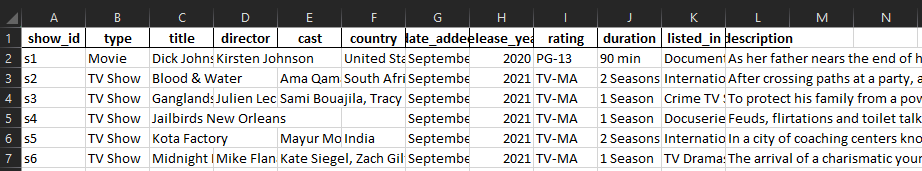

### Расширенное редактирвание листа

#### Изменение размера ячейки

In [ ]:
# Импортируем функцию для получения буквенного обозначения столбца
from openpyxl.utils import get_column_letter

# Загружаем рабочую книгу Excel
wb = openpyxl.load_workbook('Netflix.xlsx')
# Список листов для автоматической корректировки ширины столбцов
sheetlist = ['Netflix Content','US Releases','R Ratings','Movies'] # Перебираем листы

# Цикл для работы с каждым листом в списке
for sheets in sheetlist:
  ws = wb[sheets] # Получаем объект листа
  column_widths = [] # Список для хранения максимальной ширины каждого столбца
  # Перебираем все строки и ячейки, чтобы вычислить максимальную ширину
  for row in ws.iter_rows():
      for i, cell in enumerate(row):
          try:
              # Обновляем ширину столбца, если текущее значение больше предыдущего
              column_widths[i] = max(column_widths[i], len(str(cell.value)))
          except IndexError:
              # Если индекса еще нет, добавляем значение ширины
              column_widths.append(len(str(cell.value)))
  # Устанавливаем ширину столбцов на основе вычисленных значений
  for i, column_width in enumerate(column_widths):
      if column_width > 50: # Ограничиваем ширину для удобства прокрутки
        adjusted_width = 50
      else:
        # Устанавливаем ширину с небольшим запасом
        adjusted_width = (column_width + 2) * 1.05
      # Применяем рассчитанную ширину к столбцу
      ws.column_dimensions[get_column_letter(i + 1)].width = adjusted_width
# Сохраняем изменения в файле
wb.save('Netflix.xlsx')
# Закрываем рабочую книгу
wb.close()

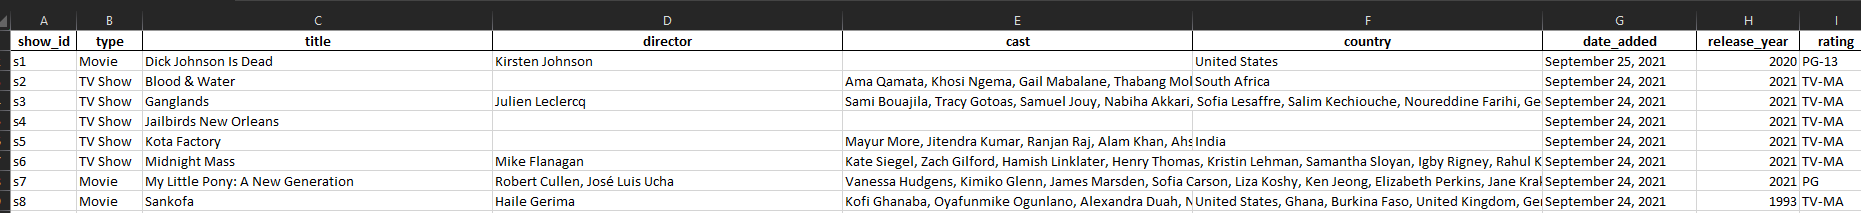

#### Добавление заголовков и объединение ячеек.

In [ ]:
# Импортируем класс Alignment из модуля openpyxl.styles для настройки выравнивания ячеек
from openpyxl.styles import Alignment

# Добавляем заголовок к каждому листу
wb = openpyxl.load_workbook('Netflix.xlsx') # Загружаем рабочую книгу Excel
sheetlist = ['Netflix Content','US Releases','R Ratings','Movies'] # Список листов для добавления заголовков

# Цикл для работы с каждым листом в списке
for sheets in sheetlist:
    ws = wb[sheets] # Получаем объект листа
    ws.insert_rows(idx=1,amount=1) # Вставляем верхнюю строку для заголовка

    # Создаем объединенную ячейку для заголовка
    ws.merge_cells('A1:D1') # Объединяем ячейки с A1 по D1
    ws['A1'].value = sheets # Устанавливаем значение ячейки A1 равным названию листа
    # Настраиваем выравнивание заголовка по центру
    ws['A1'].alignment = Alignment(horizontal="center",vertical="center")

# Сохраняем изменения в рабочей книге
wb.save('Netflix.xlsx')
# Закрываем рабочую книгу
wb.close()

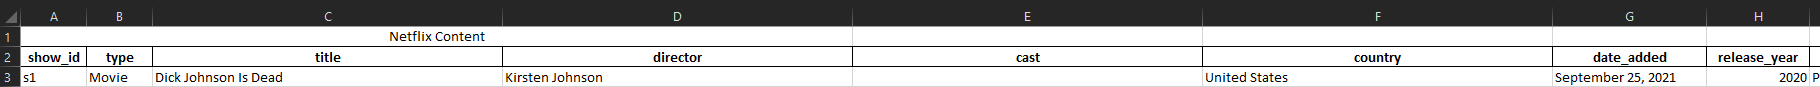

#### Добавление формул

In [ ]:
# Поскольку мы не преобразовали дату в основных данных, добавляем формулу для ее изменения

# Загружаем рабочую книгу Excel
wb = openpyxl.load_workbook('Netflix.xlsx')

# Получаем доступ к листу 'Netflix Content'
ws = wb['Netflix Content']
# Добавляем столбец и создаем наши формулы
ws.insert_cols(idx=8, amount=1) # IDX - это номер столбца, так что 8-й или H, для одного столбца
ws['H2'] = 'Date' # Создаем заголовок
# Цикл для прохода по каждой ячейке в вашем диапазоне
for row_num in range(3, len(netflix_df)+2):
    # Добавляем формулу DATEVALUE для преобразования текста в дату в столбце G
    ws[f'H{row_num}'] = f'=DATEVALUE(G{row_num})'

# Сохраняем изменения в рабочей книге
wb.save('Netflix.xlsx')
# Закрываем рабочую книгу
wb.close()

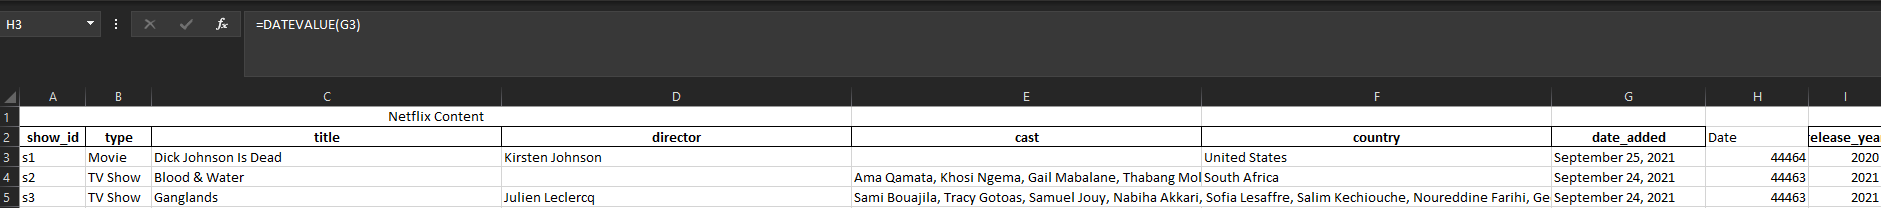

#### Создание объекта "Таблица"

In [ ]:
# Создаем таблицы Excel для каждого из листов
# Ссылка на документацию: https://openpyxl.readthedocs.io/en/stable/worksheet_tables.html

# Импортируем необходимые классы для работы с таблицами
from openpyxl.worksheet.table import Table, TableStyleInfo

# Загружаем рабочую книгу Excel
wb = openpyxl.load_workbook('Netflix.xlsx')

# Весь контент Netflix
ws = wb['Netflix Content'] # Получаем доступ к листу 'Netflix Content'
# Создаем объект таблицы с указанным именем и диапазоном ячеек
tab1 = Table(displayName="All_Netflix_Content", ref=f'A2:M{netflix_df.shape[0] + 1}')
# Настраиваем стиль таблицы
style = TableStyleInfo(name="TableStyleMedium2")
tab1.tableStyleInfo = style # Применяем стиль к таблице
ws.add_table(tab1) # Добавляем таблицу на лист

# Американские релизы
ws = wb['US Releases'] # Получаем доступ к листу 'US Releases'
# Создаем и настраиваем вторую таблицу аналогично первой
tab2 = Table(displayName="US_Releases", ref=f'A2:L{just_us_netflix.shape[0] + 1}')
style = TableStyleInfo(name="TableStyleMedium6")
tab2.tableStyleInfo = style
ws.add_table(tab2)

# Контент с рейтингом R
ws = wb['R Ratings'] # Получаем доступ к листу 'R Ratings'
# Создаем и настраиваем третью таблицу
tab3 = Table(displayName="R_Rated_Content", ref=f'A2:L{r_ratings_netflix.shape[0] + 1}')
style = TableStyleInfo(name="TableStyleDark2")
tab3.tableStyleInfo = style
ws.add_table(tab3)

# Только фильмы
ws = wb['Movies'] # Получаем доступ к листу 'Movies'
# Создаем и настраиваем четвертую таблицу
tab4 = Table(displayName="Movies", ref=f'A2:L{movies_netflix.shape[0] + 1}')
style = TableStyleInfo(name="TableStyleLight6")
tab4.tableStyleInfo = style
ws.add_table(tab4)

# Сохраняем изменения в рабочей книге
wb.save('Netflix.xlsx')
# Закрываем рабочую книгу
wb.close()

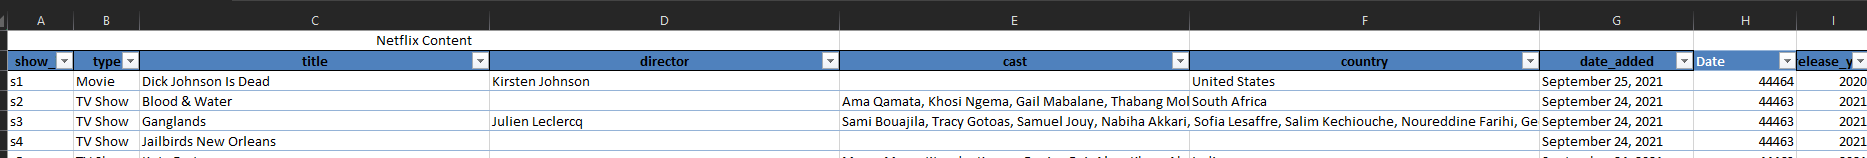

#### Установка формата ячеек

In [ ]:
# Изменение форматов дат
# Ссылка на документацию: https://openpyxl.readthedocs.io/en/stable/_modules/openpyxl/styles/numbers.html

# Загружаем рабочую книгу Excel
wb = openpyxl.load_workbook('Netflix.xlsx')

# Список листов для изменения форматов дат
sheetlist = ['Netflix Content','US Releases','R Ratings','Movies'] # Перебираем листы

# Цикл для работы с каждым листом в списке
for sheets in sheetlist:
    ws = wb[sheets] # Получаем доступ к листу
    # Если это лист 'Netflix Content', то изменяем формат даты в столбце H
    if sheets == 'Netflix Content':
        for cell in ws['H:H']:
            cell.number_format = 'm/d/yyyy' # Устанавливаем формат даты
    # Для всех остальных листов изменяем формат даты в столбце G
    else:
        for cell in ws['G:G']:
            cell.number_format = 'm/d/yyyy' # Устанавливаем формат даты

# Сохраняем изменения в рабочей книге
wb.save('Netflix.xlsx')
# Закрываем рабочую книгу
wb.close()

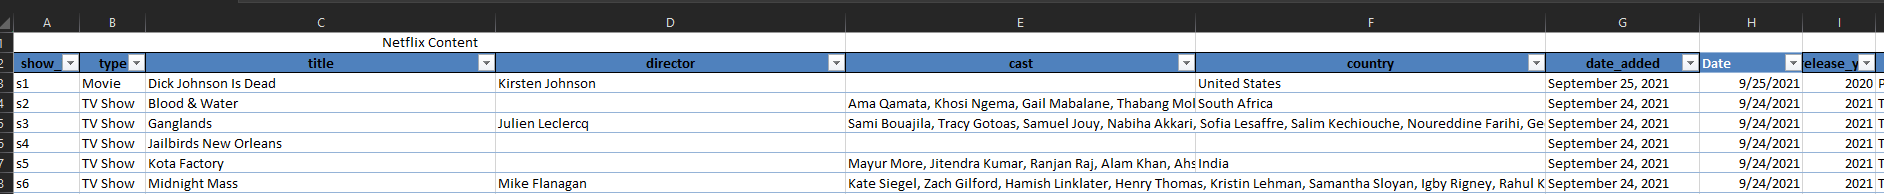

#### Условное форматирование

In [ ]:
# Добавление условного форматирования
# Ссылка на документацию: https://openpyxl.readthedocs.io/en/stable/styles.html

# Импортируем необходимые модули для условного форматирования
from openpyxl.styles import PatternFill
from openpyxl.styles.differential import DifferentialStyle
from openpyxl.formatting.rule import Rule

# Загружаем рабочую книгу Excel
wb = openpyxl.load_workbook('Netflix.xlsx')
# Получаем доступ к листу 'Netflix Content'
ws = wb['Netflix Content']

# Пример форматирования всего контента с рейтингом TV-MA
yellow_background = PatternFill(patternType='solid', fill_type='solid', start_color='00FFFF00', end_color='00FFFF00') # Создаем заливку желтым цветом
diff_style = DifferentialStyle(fill=yellow_background) # Создаем стиль с этой заливкой
rule = Rule(type="expression", dxf=diff_style) # Создаем правило с использованием этого стиля
rule.formula = ['=IF($J1="TV-MA",1,0)'] # Устанавливаем формулу для правила
ws.conditional_formatting.add(f'A1:M{netflix_df.shape[0] + 1}', rule) # Применяем условное форматирование к диапазону ячеек

# Сохраняем изменения в рабочей книге
wb.save('Netflix.xlsx')
# Закрываем рабочую книгу
wb.close()

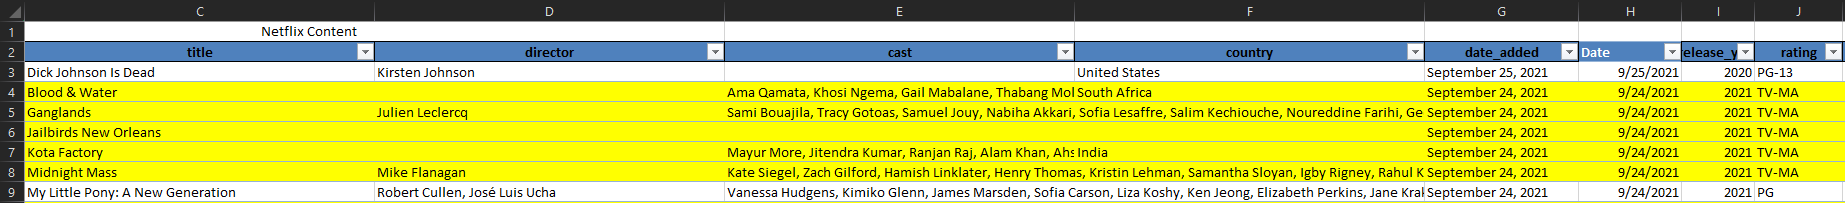

#### Закрепление области просмотра и настройка заголовков

In [ ]:
# Загружаем рабочую книгу Excel
wb = openpyxl.load_workbook('Netflix.xlsx')

# Список листов для перебора
sheetlist = ['Netflix Content','US Releases','R Ratings','Movies'] # Перебираем листы
for sheets in sheetlist:
    ws = wb[sheets] # Получаем доступ к листу
    ws.freeze_panes = 'A3' # Закрепляем область просмотра сверху до третьей строки включительно

wb.save('Netflix.xlsx') # Сохраняем изменения в рабочей книге
wb.close() # Закрываем рабочую книгу

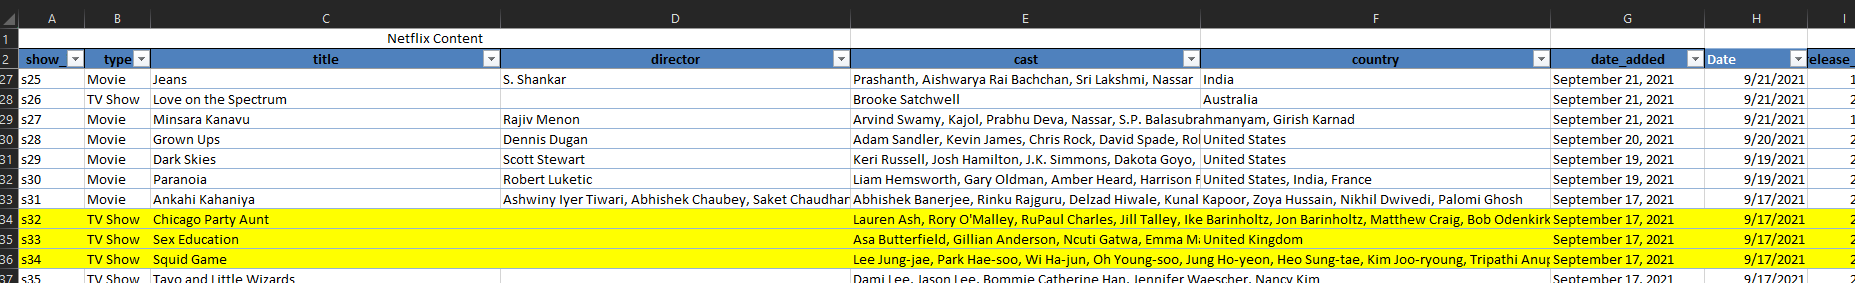


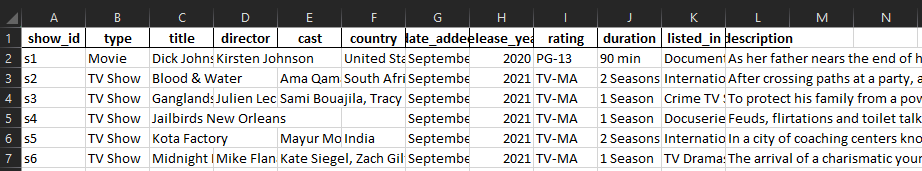